##Nature of the respondents

In [36]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
summary = pd.read_csv("data/summary.dat")
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [4]:
summary.columns

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=413)

In [5]:
summary['TESEX'].unique()

array([2, 1])

In [6]:
Female = summary['TESEX'] == 2

In [7]:
Male = summary['TESEX'] == 1

In [8]:
summary['TESEX'][Female] = 'FEMALE'
summary['TESEX'][Male] = 'MALE'

/Users/sovello/tiy2015/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Male to Female Ratio in the Study

In [22]:
gender = summary[['TESEX']]

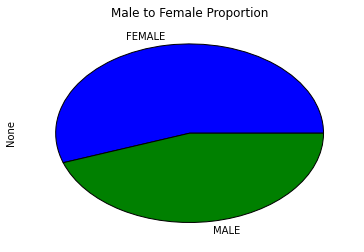

In [23]:
gender['TESEX'].value_counts().plot(kind='pie', title="Male to Female Proportion")

## Age Distribution
### Age Groups

In [24]:
summary.loc[summary.TEAGE >= 60,'Age Group']='60+'
above50 = summary.TEAGE >= 50 
below60 = summary.TEAGE < 60
summary.loc[above50 & below60, 'Age Group'] = '50-59'

above40 = summary.TEAGE >= 40
below50 = summary.TEAGE < 50

above30 = summary.TEAGE >= 30
below40 = summary.TEAGE < 40

above20 = summary.TEAGE >= 20
below30 = summary.TEAGE < 30

summary.loc[above40 & below50, 'Age Group'] = '40-49'
summary.loc[above30 & below40, 'Age Group'] = '30-39'
summary.loc[above20 & below30, 'Age Group'] = '20-29'
summary.loc[summary.TEAGE < 20, 'Age Group'] = '0-20'

In [25]:
age_groups = summary[['TEAGE', 'TESEX', 'Age Group']]

/Users/sovello/tiy2015/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/indexing.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sovello/tiy2015/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/indexing.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
age_groups = age_groups.loc[:,['Age Group', 'TESEX']]
df2 = age_groups.groupby(['Age Group', 'TESEX'])['Age Group'].count().unstack('TESEX')#.fillna(0)

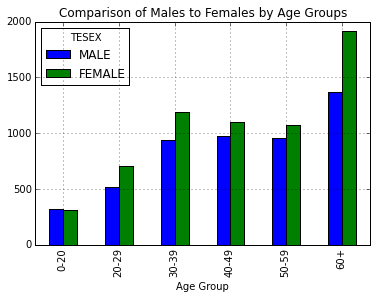

In [27]:
df2[['MALE', 'FEMALE']].plot(kind='bar', title='Comparison of Males to Females by Age Groups')

## Sleeplessness

In [49]:
sleepless = summary.loc[:,['Age Group', 'TESEX', 't010102']]
sleeplessness = pd.pivot_table(sleepless, values='t010102', index=['Age Group'], columns='TESEX', aggfunc=np.sum)

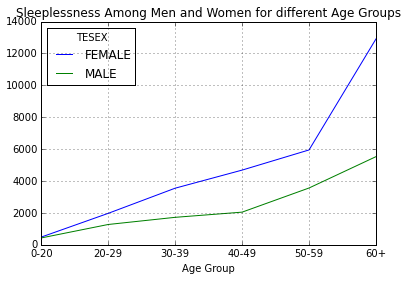

In [54]:
sleeplessness.plot(kind='line', title="Sleeplessness Among Men and Women for different Age Groups")

# Elder Care Services

In [56]:
eldercare = pd.read_csv('data/eldercare.dat')

In [62]:
elderscared = eldercare.loc[:,['TUCASEID', 'TULINENO']]
elderscared['TULINENO'].unique()

array([-1,  3,  2,  4,  5,  6,  8,  7])

In [63]:
elderscared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 2 columns):
TUCASEID    2800 non-null int64
TULINENO    2800 non-null int64
dtypes: int64(2)
memory usage: 65.6 KB


In [64]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 414 entries, tucaseid to Age Group
dtypes: float64(1), int64(411), object(2)
memory usage: 36.0+ MB


In [69]:
summaryinfo = summary[['tucaseid', 'TEAGE', 'TESEX', 'Age Group']]
summaryinfo.index = summaryinfo['tucaseid']
elderscared.index = elderscared['TUCASEID']

In [72]:
careproviders = pd.concat([summaryinfo, elderscared], axis = 1, join='inner')
careproviders.head()

,tucaseid,TEAGE,TESEX,Age Group,TUCASEID,TULINENO
20130101130123,20130101130123,47,FEMALE,40-49,20130101130123,-1
20130101130123,20130101130123,47,FEMALE,40-49,20130101130123,-1
20130101130611,20130101130611,50,FEMALE,50-59,20130101130611,-1
20130101130734,20130101130734,57,FEMALE,50-59,20130101130734,-1
20130101130735,20130101130735,27,FEMALE,20-29,20130101130735,-1


# Comparison at providing of elderly care

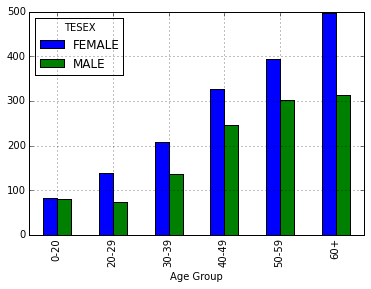

In [80]:
careproviders['count'] = 1
pd.pivot_table(careproviders, values='count', index=['Age Group'], columns='TESEX', aggfunc=np.sum).plot(kind='bar')

## Providing care outside the household

In [81]:
INHOUSE = careproviders.TULINENO == -1
EXTERNAL = careproviders.TULINENO > 1

careproviders.loc[INHOUSE, 'Beneficiary'] = 'EXTERNAL'
careproviders.loc[EXTERNAL, 'Beneficiary'] = 'INHOUSE'

In [82]:
careproviders.head()

,tucaseid,TEAGE,TESEX,Age Group,TUCASEID,TULINENO,count,Beneficiary
20130101130123,20130101130123,47,FEMALE,40-49,20130101130123,-1,1,EXTERNAL
20130101130123,20130101130123,47,FEMALE,40-49,20130101130123,-1,1,EXTERNAL
20130101130611,20130101130611,50,FEMALE,50-59,20130101130611,-1,1,EXTERNAL
20130101130734,20130101130734,57,FEMALE,50-59,20130101130734,-1,1,EXTERNAL
20130101130735,20130101130735,27,FEMALE,20-29,20130101130735,-1,1,EXTERNAL


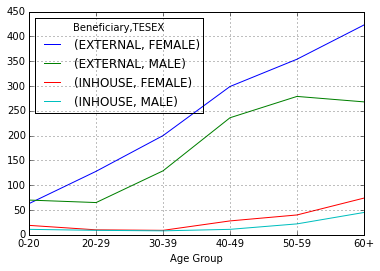

In [91]:
pd.pivot_table(careproviders, values = ('count'), index=['Age Group'], columns=['Beneficiary', 'TESEX'], 
                        aggfunc=np.sum).plot(kind='line')